In [1]:
!python -m pip install tensorflow pytorch-lightning segmentation-models-pytorch matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 715.6/715.6 KB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 KB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 KB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 51.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 KB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 69.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 33.7 MB/s eta 0:00:00
  Created wh

## Clasificación

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

2023-03-26 17:08:13.273306: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


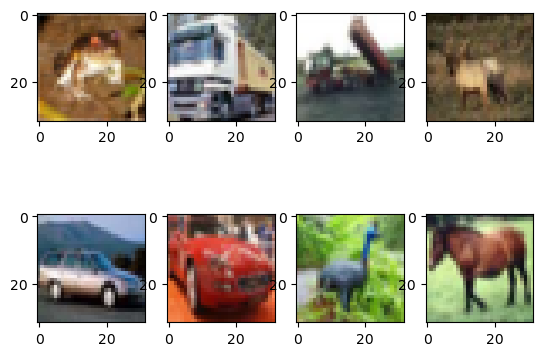

In [ ]:
row_size = 4
fig, axs = plt.subplots(ncols=row_size, nrows=2)
for i in range(row_size):
    axs[0, i].imshow(x_train[i])
    axs[1, i].imshow(x_train[row_size + i])

In [ ]:
def convnet(base_convnet_f, input_shape, nclasses = 10):
    base_model = base_convnet_f(weights = 'imagenet', include_top = False, input_shape=input_shape)
    x = base_model.output
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(512, activation = 'relu')(x)
    x = tf.keras.layers.Dense(nclasses, activation = 'softmax')(x)

    model = tf.keras.models.Model(base_model.input, outputs = x)

    for layer in base_model.layers:
        layer.trainable = False

    return model

In [ ]:
model = convnet(tf.keras.applications.VGG16, x_train.shape[1:])

2023-03-26 17:08:15.525975: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-26 17:08:15.538636: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-26 17:08:15.538731: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-26 17:08:15.539139: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX_VNNI FMA
To enable them in other operations, rebuild Ten

In [ ]:
model.compile("rmsprop", "categorical_crossentropy", metrics = ["categorical_accuracy"])

In [ ]:
y_logits = tf.keras.utils.to_categorical(y_train)
model.summary()
hist = model.fit(x_train, y_logits, epochs = 5)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

2023-03-26 17:08:21.990389: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8600


   1/1563 [..............................] - ETA: 33:51 - loss: 22.7854 - categorical_accuracy: 0.0625

2023-03-26 17:08:22.577058: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f31d46c3fe0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-26 17:08:22.577076: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2023-03-26 17:08:22.579058: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-03-26 17:08:22.579228: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2023-03-26 17:08:22.629743: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 [==============================] - 11s 6ms/step - loss: 2.2947 - categorical_accuracy: 0.5151
Epoch 2/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3080 - categorical_accuracy: 0.6040
Epoch 3/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2202 - categorical_accuracy: 0.6369
Epoch 4/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1636 - categorical_accuracy: 0.6640
Epoch 5/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0950 - categorical_accuracy: 0.6841


In [ ]:
y_logits_test = tf.keras.utils.to_categorical(y_test)
loss, acc = model.evaluate(x_test, y_logits_test)

print(f"Acierto: {round(100 * acc, 2)}%")

313/313 [==============================] - 2s 6ms/step - loss: 1.9344 - categorical_accuracy: 0.5877
Acierto: 58.77%


## Clasificación (II)

In [2]:
from segmentation_models_pytorch.datasets import SimpleOxfordPetDataset
root = "pets"

In [20]:
SimpleOxfordPetDataset.download(root)

In [4]:
import os
import shutil
images_path = os.path.join(root, "images")
annotations_path = os.path.join(root, "annotations")

trainval = open(os.path.join(annotations_path, "trainval.txt")).readlines()
test = open(os.path.join(annotations_path, "test.txt")).readlines()

os.makedirs(os.path.join(images_path, "train", "cats"), exist_ok=True)
os.makedirs(os.path.join(images_path, "train", "dogs"), exist_ok=True)
os.makedirs(os.path.join(images_path, "test", "cats"), exist_ok=True)
os.makedirs(os.path.join(images_path, "test", "dogs"), exist_ok=True)

def classify_image(line, subset):
    basename = line.split(" ")[0]
    species = line.split(" ")[2]
    subfolder = "cats" if species == "1" else "dogs"
    oldpath = os.path.join(images_path, f"{basename}.jpg")
    newpath = os.path.join(images_path, subset, subfolder, f"{basename}.jpg")
    if os.path.isfile(oldpath):
        shutil.copy(oldpath, newpath)

for line in trainval:
    classify_image(line, "train")

for line in test:
    classify_image(line, "test")

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

generador_entrenamiento = ImageDataGenerator()
datos_entrenamiento = generador_entrenamiento.flow_from_directory(os.path.join(images_path, "train"))
generador_test = ImageDataGenerator()
datos_test = generador_test.flow_from_directory(os.path.join(images_path, "test"), class_mode=None)
algunas_imagenes = next(datos_test)

Found 3680 images belonging to 2 classes.
Found 3669 images belonging to 2 classes.


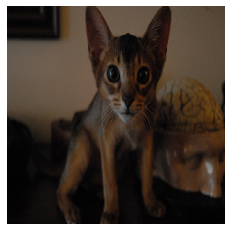

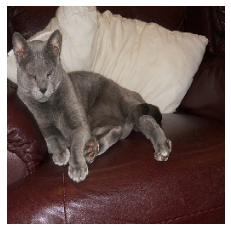

In [6]:
from matplotlib import pyplot as plt
plt.imshow(algunas_imagenes[0]/255.)
plt.axis('off')
plt.show()
plt.imshow(algunas_imagenes[1]/255.)
plt.axis('off')
plt.show()

In [7]:
from tensorflow.keras import applications
inception = applications.InceptionV3(include_top=False, input_shape=(256, 256, 3))

87910968/87910968 [==============================] - 3s 0us/step


In [8]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential
predictor = Sequential([
    Flatten(), 
    Dense(128, activation="relu"), 
    Dense(2, activation="softmax")
])
modelo = Sequential([inception, predictor])
modelo.compile(optimizer="adam", loss="categorical_crossentropy")

In [9]:
modelo.fit(datos_entrenamiento, epochs=10, batch_size=16)

Epoch 1/10
115/115 [==============================] - 83s 321ms/step - loss: 1.2509
Epoch 2/10
115/115 [==============================] - 38s 329ms/step - loss: 0.5123
Epoch 3/10
115/115 [==============================] - 39s 339ms/step - loss: 0.3670
Epoch 4/10
115/115 [==============================] - 38s 333ms/step - loss: 0.3226
Epoch 5/10
115/115 [==============================] - 39s 333ms/step - loss: 0.2762
Epoch 6/10
115/115 [==============================] - 39s 335ms/step - loss: 0.4047
Epoch 7/10
115/115 [==============================] - 38s 332ms/step - loss: 0.6003
Epoch 8/10
115/115 [==============================] - 38s 332ms/step - loss: 0.5556
Epoch 9/10
115/115 [==============================] - 39s 334ms/step - loss: 0.4612
Epoch 10/10
115/115 [==============================] - 38s 333ms/step - loss: 0.4169


In [10]:
modelo.save("clasificacion_mascotas.h5")

In [12]:
lote_test = next(datos_test)

probs = modelo.predict(lote_test)
import numpy as np
clase = np.argmax(probs, -1)

1/1 [==============================] - 1s 1s/step


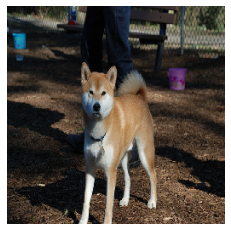

Predicción: gato


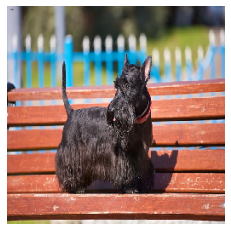

Predicción: perro


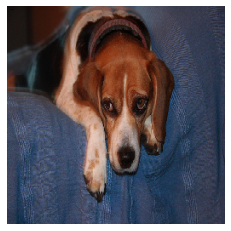

Predicción: gato


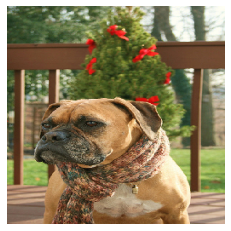

Predicción: perro


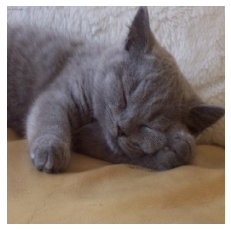

Predicción: gato


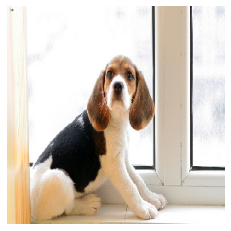

Predicción: gato


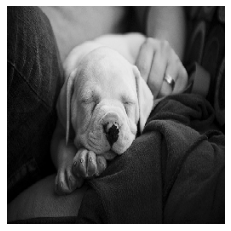

Predicción: gato


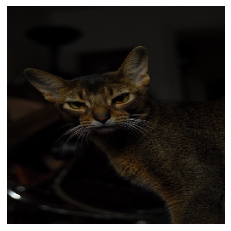

Predicción: gato


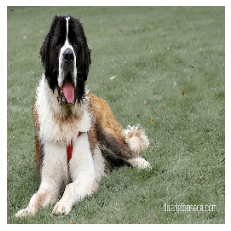

Predicción: perro


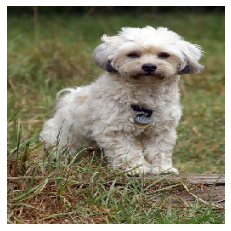

Predicción: perro


In [13]:
mostrar_imagenes = 10

for i in range(mostrar_imagenes):
    plt.imshow(lote_test[i]/255.)
    plt.axis('off')
    plt.show()
    print("Predicción:", "perro" if clase[i] else "gato")

## Segmentación
https://github.com/qubvel/segmentation_models.pytorch/blob/master/examples/binary_segmentation_intro.ipynb

In [14]:
import os
import torch
import pytorch_lightning as pl
import segmentation_models_pytorch as smp

from pprint import pprint
from torch.utils.data import DataLoader


In [15]:
train_dataset = SimpleOxfordPetDataset(root, "train")
valid_dataset = SimpleOxfordPetDataset(root, "valid")
test_dataset = SimpleOxfordPetDataset(root, "test")

n_cpu = os.cpu_count()
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=n_cpu)
valid_dataloader = DataLoader(valid_dataset, batch_size=16, shuffle=False, num_workers=n_cpu)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=n_cpu)

In [16]:
class PetModel(pl.LightningModule):

    def __init__(self, arch, encoder_name, in_channels, out_classes, **kwargs):
        super().__init__()
        self.model = smp.create_model(
            arch, encoder_name=encoder_name, in_channels=in_channels, classes=out_classes, **kwargs
        )

        # preprocessing parameters for image
        params = smp.encoders.get_preprocessing_params(encoder_name)
        self.register_buffer("std", torch.tensor(params["std"]).view(1, 3, 1, 1))
        self.register_buffer("mean", torch.tensor(params["mean"]).view(1, 3, 1, 1))

        # for image segmentation dice loss could be the best first choice
        self.loss_fn = smp.losses.DiceLoss(smp.losses.BINARY_MODE, from_logits=True)
        self.last_outputs = []

    def forward(self, image):
        # normalize image here
        image = (image - self.mean) / self.std
        mask = self.model(image)
        return mask

    def shared_step(self, batch, stage):
        image = batch["image"]
        mask = batch["mask"]

        # Comprobar condiciones: shapes de la imagen y la máscara, dimensiones divisibles por 32 (para
        # que concuerden los encoders y decoders) y máscara con valores entre 0 y 1
        assert image.ndim == 4
        h, w = image.shape[2:]
        assert h % 32 == 0 and w % 32 == 0
        assert mask.ndim == 4
        assert mask.max() <= 1.0 and mask.min() >= 0

        # Salida de la red y cálculo del error
        logits_mask = self.forward(image)
        loss = self.loss_fn(logits_mask, mask)

        # Convertimos la salida de la red en predicciones
        prob_mask = logits_mask.sigmoid()
        pred_mask = (prob_mask > 0.5).float()

        # Calculamos TP, FP, FN y TN para posteriormente computar métricas
        tp, fp, fn, tn = smp.metrics.get_stats(pred_mask.long(), mask.long(), mode="binary")
        output = {
            "loss": loss,
            "tp": tp,
            "fp": fp,
            "fn": fn,
            "tn": tn,
        }
        self.last_outputs.append(output)
        return output

    def shared_epoch_end(self, stage):
        # Juntar las métricas básicas
        tp = torch.cat([x["tp"] for x in self.last_outputs])
        fp = torch.cat([x["fp"] for x in self.last_outputs])
        fn = torch.cat([x["fn"] for x in self.last_outputs])
        tn = torch.cat([x["tn"] for x in self.last_outputs])

        # Calcular IoU por imagen individual y luego promediado, y calcularlo
        # sobre el total del conjunto de datos
        per_image_iou = smp.metrics.iou_score(tp, fp, fn, tn, reduction="micro-imagewise")
        dataset_iou = smp.metrics.iou_score(tp, fp, fn, tn, reduction="micro")

        metrics = {
            f"{stage}_per_image_iou": per_image_iou,
            f"{stage}_dataset_iou": dataset_iou,
        }
        
        self.log_dict(metrics, prog_bar=True)
        self.last_outputs = []

    def training_step(self, batch, batch_idx):
        return self.shared_step(batch, "train")            

    def on_training_epoch_end(self):
        return self.shared_epoch_end("train")

    def validation_step(self, batch, batch_idx):
        return self.shared_step(batch, "valid")

    def on_validation_epoch_end(self):
        return self.shared_epoch_end("valid")

    def test_step(self, batch, batch_idx):
        return self.shared_step(batch, "test")  

    def on_test_epoch_end(self):
        return self.shared_epoch_end("test")

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.0001)

In [17]:
model = PetModel("Unet", "resnet34", in_channels=3, out_classes=1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [21]:
trainer = pl.Trainer(
    max_epochs=5,
)

trainer.fit(
    model, 
    train_dataloaders=train_dataloader, 
    val_dataloaders=valid_dataloader,
)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type     | Params
-------------------------------------
0 | model   | Unet     | 24.4 M
1 | loss_fn | DiceLoss | 0     
-------------------------------------
24.4 M    Trainable params
0         Non-trainable params
24.4 M    Total params
97.745    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


In [22]:
# run validation dataset
valid_metrics = trainer.validate(model, dataloaders=valid_dataloader, verbose=False)
pprint(valid_metrics)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: 0it [00:00, ?it/s]

[{'valid_dataset_iou': 0.911123514175415,
  'valid_per_image_iou': 0.9031521677970886}]


In [23]:
# run test dataset
test_metrics = trainer.test(model, dataloaders=test_dataloader, verbose=False)
pprint(test_metrics)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

[{'test_dataset_iou': 0.9134052395820618,
  'test_per_image_iou': 0.9084863066673279}]


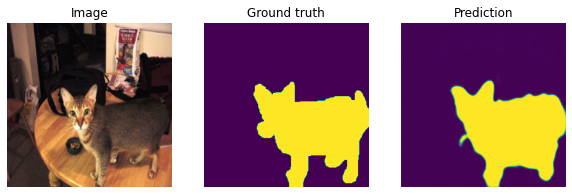

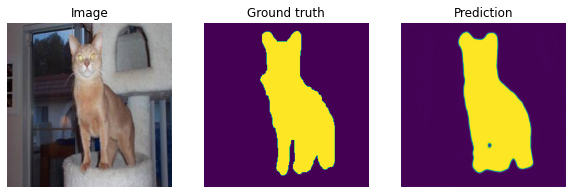

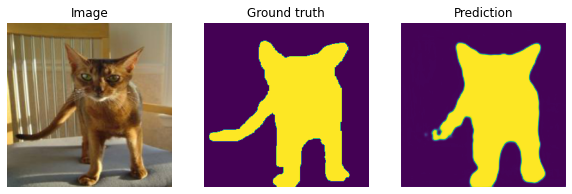

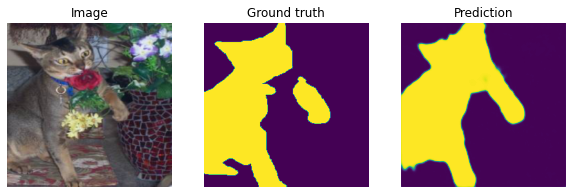

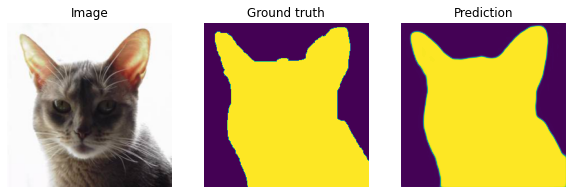

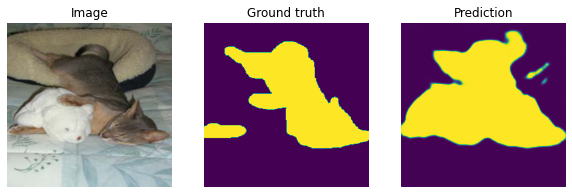

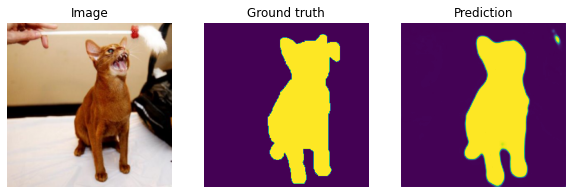

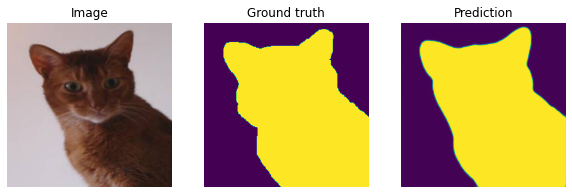

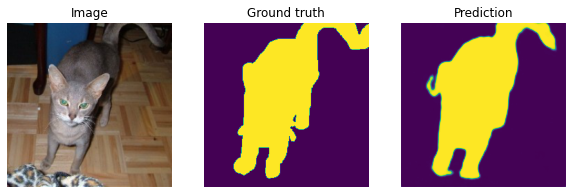

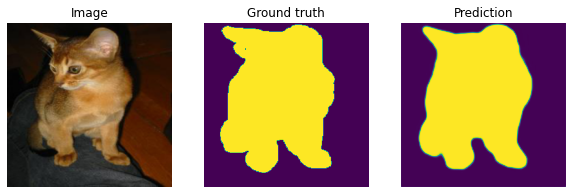

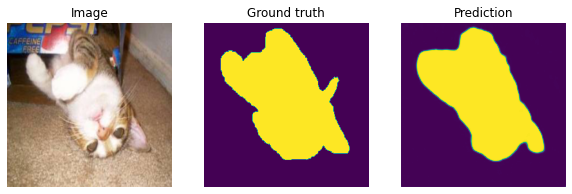

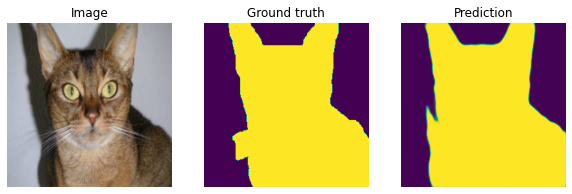

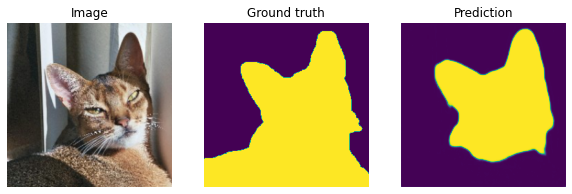

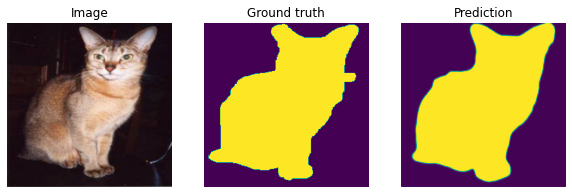

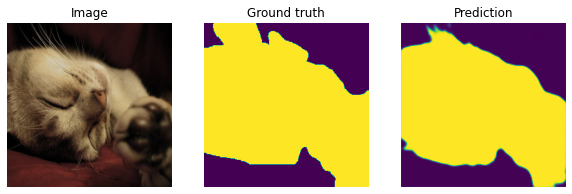

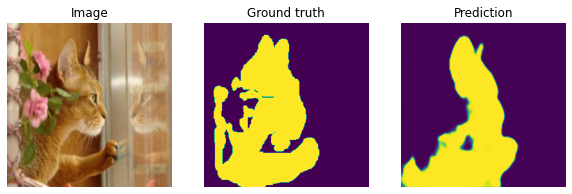

In [24]:
batch = next(iter(test_dataloader))
with torch.no_grad():
    model.eval()
    logits = model(batch["image"])
pr_masks = logits.sigmoid()

for image, gt_mask, pr_mask in zip(batch["image"], batch["mask"], pr_masks):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(image.numpy().transpose(1, 2, 0))  # convert CHW -> HWC
    plt.title("Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(gt_mask.numpy().squeeze()) # just squeeze classes dim, because we have only one class
    plt.title("Ground truth")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(pr_mask.numpy().squeeze()) # just squeeze classes dim, because we have only one class
    plt.title("Prediction")
    plt.axis("off")

    plt.show()